# Исследование надежности заемщиков


## Открыть таблицу и изучить общую информацию о данных

### Задание 1. Импортировать библиотеку pandas. Считать данные из csv-файла в датафрейм и сохранить в переменную. 

In [1]:
import pandas as pd
import seaborn

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

### Задание 2. Вывести первые 20 строчек датафрейма `data` на экран.

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


### Задание 3. Вывести основную информацию о датафрейме.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

## Удаление пропусков

### Задание 4. Вывести количество пропущенных значений для каждого столбца.

In [4]:
losts=data.isna().sum()
print(losts)
data.isna().mean()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64


children            0.000000
days_employed       0.100999
dob_years           0.000000
education           0.000000
education_id        0.000000
family_status       0.000000
family_status_id    0.000000
gender              0.000000
income_type         0.000000
debt                0.000000
total_income        0.100999
purpose             0.000000
dtype: float64

### Задание 5. В двух столбцах есть пропущенные значения. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

### Задание 6. Обработать аномалии в столбце 'days_employed'.

In [6]:
data['days_employed'] = data['days_employed'].abs()

### Задание 7. Для каждого типа занятости вывести медианное значение трудового стажа `days_employed` в днях.

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получаются аномально большие значения. Оставлю их как есть. Тем более этот столбец не понадобится вам для исследования.

### Задание 8. Вывести перечень уникальных значений столбца `children`.

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

### Задание 9. В столбце `children` есть два аномальных значения. Удалю строки, в которых встречаются такие аномальные значения из датафрейма `data`.

In [9]:
anomal_share=len(data[data['children']==-1])/data.shape[0]*100
anomal_share_1=len(data[data['children']==20])/data.shape[0]*100
print(f' доля аномалий {anomal_share}% и {anomal_share_1}%')

data = data[(data['children'] != -1) & (data['children'] != 20)]

          

 доля аномалий 0.2183507549361208% и 0.3530778164924506%


### Задание 10. Убедиться, что артефакты удалены.

In [10]:

data['gender'].unique()
len(data[data['gender']== 'XNA'])
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

.

### Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

### Задание 12. Убедиться, что все пропуски заполнены. 

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

### Задание 13. Заменитm вещественный тип данных в столбце `total_income` на целочисленный.

In [13]:
int64=['children', 'dob_years', 'education_id', 'family_status_id', 'debt', 'total_income']
for i in int64:
    data[i]=data[i].astype('int32')
data['days_employed'] = data['days_employed'].astype('float32')
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21402 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21402 non-null  int32  
 1   days_employed     21402 non-null  float32
 2   dob_years         21402 non-null  int32  
 3   education         21402 non-null  object 
 4   education_id      21402 non-null  int32  
 5   family_status     21402 non-null  object 
 6   family_status_id  21402 non-null  int32  
 7   gender            21402 non-null  object 
 8   income_type       21402 non-null  object 
 9   debt              21402 non-null  int32  
 10  total_income      21402 non-null  int32  
 11  purpose           21402 non-null  object 
dtypes: float32(1), int32(6), object(5)
memory usage: 1.6+ MB


### Обработка дубликатов

### Задание 14. Вывести на экран количество строк-дубликатов в данных. 

In [14]:
data.duplicated().sum()

54

In [15]:
data['education'] = data['education'].str.lower()
data['family_status'] = data['family_status'].str.lower()
data['income_type'] = data['income_type'].str.lower()
data['purpose'] = data['purpose'].str.lower()
data.duplicated().sum()

71

### Задание 15. Обработаnm неявные дубликаты в столбце `education`. 

In [16]:
data = data.drop_duplicates()
data.duplicated().sum()

0

### Категоризация данных

### Задание 16. На основании диапазонов, указанных ниже, создаk в датафрейме `data` столбец `total_income_category` с категориями:

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.




In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

### Задание 17. Вывести на экран перечень уникальных целей взятия кредита из столбца `purpose`.

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

### Задание 18. Создам функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.


In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

## Исследуйте данные и ответьте на вопросы

**Задание 19. Есть ли зависимость между количеством детей и возвратом кредита в срок?**

In [22]:
child_debt=data.groupby('children').agg({'debt':['count','sum']})
child_percent=(child_debt['debt']['sum']/child_debt['debt']['count']).mul(100).round(2).astype(str).add(' %')
print(child_percent) 
# в результатах указан процент не вернувших кредит, в группах по кол-ву детей

children
0    7.54 %
1    9.23 %
2    9.45 %
3    8.18 %
4    9.76 %
5     0.0 %
dtype: object


In [23]:
data_pivot_children_sum=data.pivot_table(index=['income_type'],columns='children',values='debt',aggfunc='sum')
data_pivot_children_count=data.pivot_table(index=['income_type'],columns='children',values='debt',aggfunc='count')
data_pivot_children_mean=data.pivot_table(index=['income_type'],columns='children',values='debt',aggfunc='mean')
display(data_pivot_children_sum,data_pivot_children_count, data_pivot_children_mean)
# Сделал три сводных таблицы, чтоб легче читались, внутри одной таблицы отображается нечитабельно.
# сводная таблица показывает количество людей какого типа занятости и с каким кол-ом детей не отдают кредит.

children,0,1,2,3,4,5
income_type,,,,,,
безработный,0.0,1.0,NaN,NaN,NaN,NaN
в декрете,NaN,NaN,1.0,NaN,NaN,NaN
госслужащий,59.0,19.0,6.0,2.0,0.0,0.0
компаньон,226.0,106.0,37.0,5.0,0.0,0.0
пенсионер,198.0,14.0,3.0,1.0,0.0,NaN
предприниматель,0.0,NaN,NaN,NaN,NaN,NaN
сотрудник,580.0,304.0,147.0,19.0,4.0,0.0
студент,0.0,NaN,NaN,NaN,NaN,NaN


children,0,1,2,3,4,5
income_type,,,,,,
безработный,1.0,1.0,NaN,NaN,NaN,NaN
в декрете,NaN,NaN,1.0,NaN,NaN,NaN
госслужащий,866.0,354.0,187.0,36.0,7.0,1.0
компаньон,3137.0,1298.0,529.0,79.0,2.0,2.0
пенсионер,3510.0,275.0,20.0,6.0,1.0,NaN
предприниматель,2.0,NaN,NaN,NaN,NaN,NaN
сотрудник,6574.0,2880.0,1315.0,209.0,31.0,6.0
студент,1.0,NaN,NaN,NaN,NaN,NaN


children,0,1,2,3,4,5
income_type,,,,,,
безработный,0.000000,1.000000,NaN,NaN,NaN,NaN
в декрете,NaN,NaN,1.000000,NaN,NaN,NaN
госслужащий,0.068129,0.053672,0.032086,0.055556,0.000000,0.0
компаньон,0.072043,0.081664,0.069943,0.063291,0.000000,0.0
пенсионер,0.056410,0.050909,0.150000,0.166667,0.000000,NaN
предприниматель,0.000000,NaN,NaN,NaN,NaN,NaN
сотрудник,0.088226,0.105556,0.111787,0.090909,0.129032,0.0
студент,0.000000,NaN,NaN,NaN,NaN,NaN


Вывод: как видно из данных, количество детей влияет на способность отдать кредит. Группа людей не имеющих детей отдаёт кредиты в среднем на 2% лучше, но стоит отметить что основными неплательщиками в этой группе являются сотрудники и компаньоны. Группа людей с 3мя детьми так же имеет низкий процент невозврата, возможная причина-повышенная ответственность из-за кол-ва детей и забота об их будущем. Группы с одним, двумя и четырьмя детьми показывают схожие результаты, опять же основными неплательщиками являются сотрудники. Группа с пятью детьми не имеет просрочек, но по количеству опрошенных является самой маленькой и я сомневаюсь что такого объёма данных хватит для корректных выводов, но если выборка репрезентативна, то можно сделать вывод, что заёмщики с 5ю детьми самые надёжные и ответственные.

<AxesSubplot:xlabel='children', ylabel='debt'>

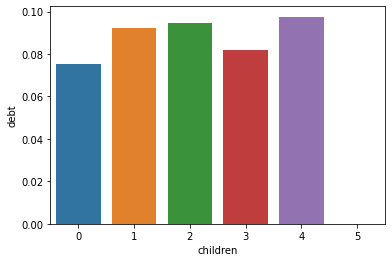

In [24]:
seaborn.barplot(y='debt', x='children', data=data, ci=None) 
# столбчатая гистограмма, отражающая распределение неплательшиков по группам с кол-ом детей.

**Задание 20. Есть ли зависимость между семейным положением и возвратом кредита в срок?**

family_status
в разводе                7.06 %
вдовец / вдова           6.62 %
гражданский брак         9.31 %
женат / замужем          7.56 %
не женат / не замужем    9.76 %
dtype: object


<AxesSubplot:xlabel='debt', ylabel='family_status'>

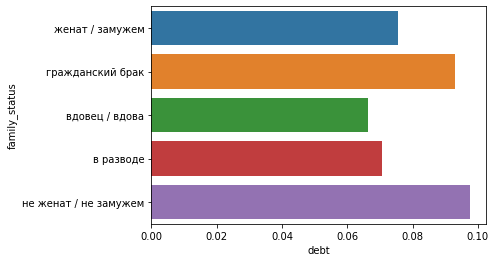

In [25]:
family_debt=data.groupby('family_status').agg({'debt':['count','sum']}) 
family_percent=(family_debt['debt']['sum']/family_debt['debt']['count']).mul(100).round(2).astype(str).add(' %')
print(family_percent) # в результатах указан процент не вернувших кредит, в группах по семейному статусу
seaborn.barplot(x='debt', y='family_status', data=data, ci=None)
# столбчатая гистограмма, отражающая распределение неплательшиков, сгрупированных по семейному положению.

**Вывод:** Из результатов видно, что самой ненадёжной категорией являются неженатые/незамужние люди, практически такой же процент невозврата кредита в группе гражданский брак. Могу объяснить данное явление, как следствие образа жизни не отягощенного опытом, обязательствами и ответственностью, присущих семейным людям.
Интересен, тот факт что группы "в разводе", "вдовец / вдова", хоть по сути и являются не замужними/женатыми людьми, но процент невозврата показали ниже. Смею предположить, что семейная жизнь наложила отпечаток на таких людей и ответственность им присуща в больщей степени, чем тем кто никогда не состоял в браке.
Чуть выше процент невозврата у женатых/замужних. Разницу с группами в которых люди потеряли партнера, могу обьяснить текущими сложностями семейной жизни, повышенными расходами на быт и содержание детей.

**Задание 21. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?**

total_income_category
A     8.0 %
B    7.06 %
C     8.5 %
D    6.02 %
E    9.09 %
dtype: object
total_income_category    A      B      C     D    E
income_type                                        
безработный            NaN    0.0    1.0   NaN  NaN
в декрете              NaN    NaN    1.0   NaN  NaN
госслужащий            NaN   18.0   67.0   1.0  0.0
компаньон              2.0  109.0  262.0   1.0  0.0
пенсионер              NaN   31.0  176.0   7.0  2.0
предприниматель        NaN    0.0    NaN   NaN  NaN
сотрудник              0.0  196.0  846.0  12.0  0.0
студент                NaN    NaN    0.0   NaN  NaN


<AxesSubplot:xlabel='debt', ylabel='total_income_category'>

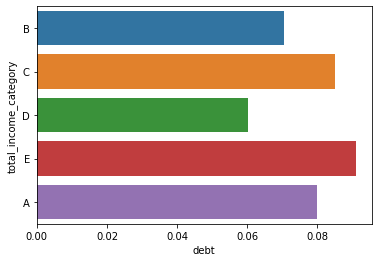

In [26]:
income_cat_debt=data.groupby('total_income_category').agg({'debt':['count','sum']})
income_cat_percent=(income_cat_debt['debt']['sum']/income_cat_debt['debt']['count']).mul(100).round(2).astype(str).add(' %')
print(income_cat_percent)
# проценты невозврата кредита по группам дохода

#Меня заинтересовало кто именно в группах дохода портит статистику и не отдаёт кредиты.
#Я полагаю, что зная тип занятости неплательщика, можно предположить причины невозврата.
#data_pivot сводная таблица с данными о кол-ве и типе занятости неплетельщиков в каждой группе по доходу.
data_pivot_debt=data.pivot_table(index=['income_type'],columns='total_income_category',values='debt',aggfunc='sum')
print(data_pivot_debt)
seaborn.barplot(x='debt', y='total_income_category', data=data, ci=None)
# столбчатая гистограмма, отражающая распределение неплательшиков по группам дохода.




**Вывод:**  Как видно из данных исследования самый большой процент невозврата кредита в группе Е с доходом до 30000. В данной группе кредиты не вернули пенсионеры. Одной из причин такого поведения могла стать финансовая неграмотность и непонимание условий кредитования, либо смерть заёмщика.

Следующая по убыванию процента не возврата группа С. В ней неплательщиками в основном стали сотрудники, подозреваю что в доле сотрудников, содержится много неженатых/незамужних людей, которые хуже отдают кредиты, требуется дополнительное исследование для этой гипотезы. Так же в этой группе неплательщиками стали компаньоны- возможно из-за бизнесс рисков, а так же пенсионеры причинами невозврата снова предположу смертность и финансовую неграмотность.

В группе В наблюдается схожая тенденция, но интересен момент, что предприниматели отдают кредит вовремя, предположу, что для этой группы лиц с такими доходами для ведения бизнесса критически важна кредитная история и возможность брать кредит при изменениях коньюктуры рынка.

В группе C самым высоким доходом неплательщиками стали компаньоны-бизнес риски.

Группа с самым низким процентом невозврата D. Люди с заработком от 30000-50000. Могу предположить что к данной группе относятся люди с размеренным бытом и регулярным заработком, отсутствием высоких рисков, присущих компаньонам и предпринимателям, даёт возможность планировать свой бюджет и планово закрывать кредиты.   



**Задание 22. Как разные цели кредита влияют на его возврат в срок?**

purpose_category
операции с автомобилем      9.35 %
операции с недвижимостью    7.26 %
получение образования       9.25 %
проведение свадьбы          7.91 %
dtype: object


<AxesSubplot:xlabel='debt', ylabel='purpose_category'>

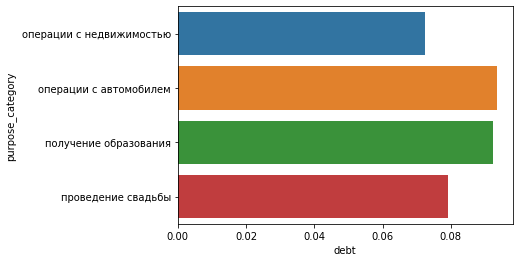

In [27]:
import seaborn
purpose_cat_debt=data.groupby('purpose_category').agg({'debt':['count','sum']})
purpose_cat_percent=(purpose_cat_debt['debt']['sum']/purpose_cat_debt['debt']['count']).mul(100).round(2).astype(str).add(' %')
print(purpose_cat_percent) # проценты невозврата кредита по группам цели кредитования.
seaborn.barplot(x='debt', y='purpose_category', data=data, ci=None)
# столбчатая гистограмма, отражающая распределение неплательшиков по цели кредитования.


**Вывод:** Из результатов исследования можно заключить, что кредиты с целью покупки автомобиля и получения образования имеют повышенный риск невозврата заёмщиками. Предполагаю, что в случае с автокредитованием к такой ситуации приводит массированная реклама "доступного" автокредита, в сумме с низкой кредитной грамотностью населения и нестабильной экономичекой обстановкой в стране.
Подобные результы невозврата кредитов на образование могу объяснить предположением, что такой тип кредита популярен у людей желающих сменить профессию, либо у молодых людей не попавших на бюджетные места в ВУЗы, совместить работу и учёбу получается не у всех, отсюда фин проблемы и как следствие невозврат средств в банки.
Самым низким уровнем невозврата обладают кредиты на операции с недвижимостью, предполагаю, что этому способствует довольно лояльная ипотечная политика государства, возможность реструктуризации кредитных обязательств, наличие возможности оплатить часть кредита материнским капиталом, а так же длительный срок погашения кредита.

**Задание 23. Приведите возможные причины появления пропусков в исходных данных.**

*Ответ:* Я заметил тот факт, что количество пропусков в двух стобцах days_employed и total_income равно. Сперва была гипотеза, что это человеческий фактор и люди не помнят свой рабочий стаж, без запроса в отдел кадров, следовательно те же люди не должны были помнить и свой доход, что весьма сомнительно, либо скрыть эту информацию, что тоже подозрительно для банковских данных. Я предполагаю, что есть факт утери данных из-за технических причин.

**Задание 24. Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.**

*Ответ:* Медиана лучше подходит для выборок значений с выбросами, в нашем случае в столбце total_income минимальное и максимальное значение отличается в 107 раз, это указывает на ненормальное распределение значений. Проверить эту гипотезу можно тестом Колмогорова-Смирнова(к сожалению не хватило опыта написать код). Но самое интересное, что даже в случае если распределние значений было бы нормальным, значения медианы и среднего арифмитического были бы равны, что говорит в пользу использования медианы. Медианное значение 142594, средне арифметическое 165318.

## Общий вывод.

При исследовании датафрейма(источник:'https://code.s3.yandex.net/datasets/data.csv') были выявлены следующие факты:
1) В столбце 'days_employed': значения указаны со знаком минус. Так же в этом столбце есть некорректные данные, а именно указан трудовой стаж более 1000лет. Так как данный столбец не является критически важным для исследования, работа с аномалиями не проводилась. 

2) Найдено одинаковое количество пропусков в столбцах 'days_employed' и 'total_income', что говорит о технических причинах появления данных пропусков. Пропуски в 'total_income' заменены медианным значением заработка по виду занятости заёмщиков.

3) В столбцt 'children' найдены аномальные значения -1;20. Доля аномальных значений 0,2% и 0,4% соответственно. Строки с артефактами удалены.

4) В стобце 'gender' найдено аномальное значение 'XNA' в единственном экземпляре, строку с этим значением оставил в датасете, так как нет никакого влияния на исследование.

Мои рекомендации по скоррингу заёмщиков.

Более высокую оценку(чем выше оценка, тем больше вероятность одобрения кредита) при ранжировании заёмщиков стоит присваивать бездетным людям, но при этом имевшим в прошлом и в настоящем опыт брачных отношений, уровень дохода которых выше 30000, берущих кредиты на свадьбы и манипуляции с недвижимостью. Среднюю оценку ставить людям имеющим 1до3 детей, состоящим в  гражданском браке или в официальных отношениях, уровень дохода которых от 50000, берущих кредиты на любые цели. И низкую оценку для людей с большим кол-ом детей более 3, заработком менее 30000р, а так же для неженатых/незамужних людей, берущих автокредиты и кредиты на образование.
Считаю, что особого внимания заслуживают такие категории граждан как пенсионеры, женщины в декрете, сотрудники предприятий и компаньоны в бизнесс проектах так как у граждан с таким типом занятости больше всего фактов неоплаты кредита.
